# Keyword Handling

Goals:

* Create `keyword_search.csv` containing possible misspellings: permutations and drop 1 character
from `keyword.csv`

In [15]:
# import keywords

import pandas as pd

keyword_df = pd.read_csv('../data/keywords/keywords.csv')
keyword_df

keyword_df.loc[keyword_df['keyword'] == 'dbt'].type.item()
keyword_df

,keyword,type,class,misspell
0,therapy,behavioral,behavioral_all,0
1,psychotherapy,behavioral,behavioral_all,0
2,dbt,behavioral,behavioral_all,0
3,dialectical behavioral therapy,behavioral,behavioral_all,0
4,linehan,behavioral,behavioral_all,0
...,...,...,...,...
84,buproprion,ndri,meds_all,0
85,ndri,ndri,meds_all,0
86,treatment,general,general,0
87,treat,general,general,0


In [15]:
from itertools import permutations

# create all permutations of keywords
perms = list(permutations('abc'))

# for perm in list(perms):
#          print (''.join(perm))
# ''.join(perms[0])

misspelled_dict = {'keyword':[],'type':[],'class':[],'misspell':[]}
misspelled_dict

# for keyword in keyword_df['keyword']:
#     perms = list(permutations(keyword))
#     for perm in perms:
#            misspelled_dict['keyword'].append(''.join(perm))
#            misspelled_dict['type'].append(keyword_df.loc[keyword_df['keyword'] == keyword].type.item())
#            misspelled_dict['class'].append(keyword_df.loc[keyword_df['keyword'] == keyword]['class'].item())
#            misspelled_dict['misspell'].append(1)

# misspelled_dict

for word in 'cognitive behavioral'.split():
     print(word)


# 2-cycle function

for i in range(len(word)):
    hold_1 = word[i]
    hold_2 = word[((i+1) % len(word))]
    out = ''
    for j in range(len(word)):
        if j == i:
              out += hold_2
        elif j == ((i+1) % len(word)):
              out += hold_1
        else:
              out += word[j]


# str = 'abc'
# # empty=''
# # for j in range(len(str)):
# #    empty += str[j]
# # print(empty)  
# for i in range(len(str)):
#     hold_1 = str[i]
#     hold_2 = str[((i+1) % len(str))]
#     out = ''
#     for j in range(len(str)):
#         if j == i:
#               out += hold_2
#         elif j == ((i+1) % len(str)):
#               out += hold_1
#         else:
#               out += str[j]

           


cognitive
behavioral
bac
acb
cba


# Vectorization Dictionaries

1. We will use `CountVectorizer` and `TfidVectorizer` from `sklearn.feature_extraction.text` to build dictionaries of keywords tuning various hyperparameters: `max_df`,`min_df`.
2. We will vectorize data using a custom dictionary from our team in `CountVectorizer` and `TfidVectorizer`.
3. We will try **word embedding** techniques: *Bag of words (BOW)*, *Word2Vec*, *Continuous bag of words (CBOW)*, *GloVe* -- https://www.turing.com/kb/guide-on-word-embeddings-in-nlp#what-is-word-embedding?

## Steps

1. Import data
2. Vectorize
3. Print dictionary

In [45]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [94]:
# import data
post_df = pd.read_csv('../data/coded/processed_and_coded_posts.csv')

post_df

,created_utc,subreddit,date_created,self,is_relevant,highly_relevant,processed_text,title
0,1643066256,BPD,2022-01-24 23:17:36,0,0,0,living bpd hi sure ok post please remove start...,Living with BPD
1,1643064417,BPD,2022-01-24 22:46:57,1,0,0,feel like i’m losing battle nothing helping i’...,i feel like i’m losing my battle and nothings ...
2,1643064326,BPD,2022-01-24 22:45:26,1,0,0,way social medium assumes thing portraying bpd...,The Way Social Media Assumes Things About and ...
3,1643062602,BPD,2022-01-24 22:16:42,1,0,0,cope family doesn’t believe mental illness dia...,How to cope with family who doesn’t believe in...
4,1643061431,BPD,2022-01-24 21:57:11,1,0,0,lost fppartner i’m addicted dating apps hoping...,Lost my FP/partner and now I’m addicted to dat...
...,...,...,...,...,...,...,...,...
595,1643579271,BPD,2022-01-30 21:47:51,1,1,1,im depressed got intense fear abandonment alon...,I'm depressed and got intense fear of abandonm...
596,1643578689,BPD,2022-01-30 21:38:09,1,0,0,bf always criticizes let know something upset ...,My BF Always Criticizes(?) Me When I Let Him K...
597,1643577150,BPD,2022-01-30 21:12:30,0,0,0,husband unintentionally stopped taking med won...,Husband unintentionally stopped taking his med...
598,1643575704,BPD,2022-01-30 20:48:24,1,0,0,splitting don’t even know i’m borderline know ...,Splitting


## Practice vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [40]:
# instantiate vectorizer classes
# stop_words = 'english' removes 'is','the', etc.

count_vec = CountVectorizer(stop_words='english')

count_matrix = count_vec.fit_transform(post_df.processed_text)
count_df = pd.DataFrame(data = count_matrix.toarray(), 
                        columns = count_vec.get_feature_names_out())
count_df

,10,100,1000,10000x,100mg,100x,1010,1011,1012,1020,...,youthconcession,youtube,youve,zero,zip,zodiac,zoloft,zone,zoom,édit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# instantiate vectorizer classes
# stop_words = 'english' removes 'is','the', etc.

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(post_df.processed_text)
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), 
                        columns = tfidf.get_feature_names_out())

tfidf_df

,10,100,1000,10000x,100mg,100x,1010,1011,1012,1020,...,youthconcession,youtube,youve,zero,zip,zodiac,zoloft,zone,zoom,édit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115179,0.0,0.0


In [43]:
# instantiate vectorizer classes
# stop_words = 'english' removes 'is','the', etc.

count_vec = CountVectorizer(stop_words='english', max_features = 20)

count_matrix = count_vec.fit_transform(post_df.processed_text)
count_df = pd.DataFrame(data = count_matrix.toarray(), 
                        columns = count_vec.get_feature_names_out())
count_df

,bpd,day,don,dont,feel,feeling,friend,im,know,like,make,people,really,relationship,thing,think,time,ve,want,year
0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0
1,1,0,4,0,3,0,2,0,3,3,0,0,2,0,1,0,0,3,1,2
2,2,0,0,0,1,0,0,0,0,3,0,2,0,1,1,0,1,2,0,2
3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,2,0,0,0,0,0,1,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,1,0,3,1,0,0,6,2,3,2,0,0,0,0,0,0,0,2,1
596,0,5,0,4,6,0,0,9,5,8,1,0,0,0,7,1,0,0,1,0
597,1,1,3,0,2,1,0,0,4,2,0,0,3,0,1,0,2,0,4,1
598,0,1,7,0,2,2,1,0,2,1,2,1,0,1,1,0,0,0,2,1


In [44]:
# instantiate vectorizer classes
# stop_words = 'english' removes 'is','the', etc.

tfidf = TfidfVectorizer(stop_words='english', max_features = 20)

tfidf_matrix = tfidf.fit_transform(post_df.processed_text)
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), 
                        columns = tfidf.get_feature_names_out())

tfidf_df

,bpd,day,don,dont,feel,feeling,friend,im,know,like,make,people,really,relationship,thing,think,time,ve,want,year
0,0.801085,0.000000,0.000000,0.000000,0.221616,0.000000,0.000000,0.000000,0.231460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505545,0.000000
1,0.112775,0.000000,0.538005,0.000000,0.280788,0.000000,0.280848,0.000000,0.293259,0.278287,0.000000,0.000000,0.249742,0.000000,0.120415,0.000000,0.000000,0.448984,0.106754,0.294644
2,0.340786,0.000000,0.000000,0.000000,0.141415,0.000000,0.000000,0.000000,0.000000,0.420467,0.000000,0.408350,0.000000,0.226727,0.181937,0.000000,0.181937,0.452251,0.000000,0.445182
3,0.923633,0.000000,0.000000,0.000000,0.383278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.253659,0.000000,0.176514,0.000000,0.000000,0.000000,0.368709,0.000000,0.000000,0.000000,0.000000,0.000000,0.227093,0.000000,0.000000,0.846748,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.133854,0.000000,0.436476,0.090747,0.000000,0.000000,0.734394,0.189555,0.269817,0.268354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207010,0.142838
596,0.000000,0.345422,0.000000,0.300364,0.281017,0.000000,0.000000,0.568550,0.244582,0.371352,0.069251,0.000000,0.000000,0.000000,0.421796,0.070442,0.000000,0.000000,0.053421,0.000000
597,0.122220,0.149618,0.437297,0.000000,0.202869,0.143750,0.000000,0.000000,0.423759,0.201062,0.000000,0.000000,0.405986,0.000000,0.130500,0.000000,0.260999,0.000000,0.462779,0.159660
598,0.000000,0.122186,0.833280,0.000000,0.165674,0.234787,0.124282,0.000000,0.173032,0.082099,0.244962,0.119599,0.000000,0.132810,0.106573,0.000000,0.000000,0.000000,0.188965,0.130387


## Import custom vocabulary for vectorizer

In [137]:
keyword_df = pd.read_csv('../data/keywords/keywords.csv')

# preprocess keyword case
keyword_df['keyword'] = keyword_df['keyword'].str.lower()

# create keyword dictionary
vocab = {keyword_df.keyword[i] : i for i in range(len(keyword_df))}
vocab


{'therapy': 0,
 'psychotherapy': 1,
 'dbt': 2,
 'dialectical behavioral therapy': 3,
 'linehan': 4,
 'cbt': 5,
 'cognitive behavioral therapy': 6,
 'emdr': 7,
 'eye movement desensitization and reprocessing': 8,
 'trauma based': 9,
 'trauma informed ': 10,
 'trauma therapy': 11,
 'somatic': 12,
 'somatic therapy': 13,
 'therapist': 14,
 'mbt': 15,
 'mentalization based therapy': 16,
 'php': 17,
 'partial hospitalization program': 18,
 'iop': 19,
 'intensive outpatient program': 20,
 'ssri': 21,
 'ssris': 22,
 'antidepressant': 23,
 'anti-depressant': 24,
 'zoloft': 25,
 'sertraline': 26,
 'escitalopram': 27,
 'lexapro': 28,
 'cipralex': 29,
 'prozac': 30,
 'fluoxetine': 31,
 'prozep': 32,
 'olena': 33,
 'oxactin': 34,
 'citalopram': 35,
 'pexeva': 36,
 'brisdelle': 37,
 'paxil': 38,
 'paroxetine': 39,
 'celexa': 40,
 'snri': 41,
 'snris': 42,
 'venlafaxine ': 43,
 'effexor': 44,
 'effexorxr': 45,
 'antipsychotics': 46,
 'anti-psychotics': 47,
 'seroquel': 48,
 'quetiapine': 49,
 'aripi

### Create count of custom keywords

In [138]:
# instantiate vectorizer classes
# stop_words = 'english' removes 'is','the', etc.

count_vec = CountVectorizer(stop_words='english', vocabulary = vocab)

count_matrix = count_vec.fit_transform(post_df.processed_text)
count_df = pd.DataFrame(data = count_matrix.toarray(), 
                        columns = count_vec.get_feature_names_out())
count_df

,therapy,psychotherapy,dbt,dialectical behavioral therapy,linehan,cbt,cognitive behavioral therapy,emdr,eye movement desensitization and reprocessing,trauma based,...,buproprion,ndri,treatment,treat,side effects,medications,meds,medication,drug,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyze custom keywords occurence in posts

In [139]:
# sum of total custom keywords
print('Total occurence of keywords in',len(post_df),'posts\n==============')
print(count_df.sum(axis=0))
print()

# make total occurence dataframe 
total_count_df = pd.DataFrame(count_df.sum(axis=0),columns=['count'])
rel_keys = total_count_df.loc[(total_count_df['count'] > 0)]
irrel_keys = total_count_df.loc[total_count_df['count'] == 0]

print(len(rel_keys), 'of the custom keywords are relevant.')
print(len(irrel_keys), 'of the custom keywords are irrelevant.')
print()

print('The relevant keywords and their total occurence are...')
relevant

Total occurence of keywords in 600 posts
therapy                           110
psychotherapy                       0
dbt                                47
dialectical behavioral therapy      0
linehan                             0
                                 ... 
medications                         0
meds                                0
medication                         35
drug                               21
drugs                               0
Length: 89, dtype: int64

22 of the custom keywords are relevant.
67 of the custom keywords are irrelevant.

The relevant keywords and their total occurence are...


,count
therapy,110
dbt,47
cbt,6
emdr,2
therapist,102
antidepressant,5
zoloft,2
sertraline,1
lexapro,3
antipsychotics,2


In [140]:
# max of each keyword to appear in a single post
print('Max occurence of keyword in a single post \n==============')
print(count_df.max(axis=0))
print()

# make max occurence dataframe 
max_keys = pd.DataFrame(count_df.max(axis=0),columns=['max_count'])

print('The max occurence in a single post for relevant keywords is...')

max_keys.loc[max_keys['max_count'] > 0]

Max occurence of keyword in a single post 
therapy                           4
psychotherapy                     0
dbt                               5
dialectical behavioral therapy    0
linehan                           0
                                 ..
medications                       0
meds                              0
medication                        5
drug                              3
drugs                             0
Length: 89, dtype: int64

The max occurence in a single post for relevant keywords is...


,max_count
therapy,4
dbt,5
cbt,2
emdr,1
therapist,8
ssri,1
antidepressant,1
zoloft,2
sertraline,1
lexapro,1


### Add keyword occurence as a feature to post dataframe

In [141]:
post_key_df = pd.concat([post_df,count_df],axis=1)
post_key_df

,created_utc,subreddit,date_created,self,is_relevant,highly_relevant,processed_text,title,therapy,psychotherapy,...,buproprion,ndri,treatment,treat,side effects,medications,meds,medication,drug,drugs
0,1643066256,BPD,2022-01-24 23:17:36,0,0,0,living bpd hi sure ok post please remove start...,Living with BPD,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1643064417,BPD,2022-01-24 22:46:57,1,0,0,feel like i’m losing battle nothing helping i’...,i feel like i’m losing my battle and nothings ...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1643064326,BPD,2022-01-24 22:45:26,1,0,0,way social medium assumes thing portraying bpd...,The Way Social Media Assumes Things About and ...,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1643062602,BPD,2022-01-24 22:16:42,1,0,0,cope family doesn’t believe mental illness dia...,How to cope with family who doesn’t believe in...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1643061431,BPD,2022-01-24 21:57:11,1,0,0,lost fppartner i’m addicted dating apps hoping...,Lost my FP/partner and now I’m addicted to dat...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1643579271,BPD,2022-01-30 21:47:51,1,1,1,im depressed got intense fear abandonment alon...,I'm depressed and got intense fear of abandonm...,0,0,...,0,0,0,0,0,0,0,0,0,0
596,1643578689,BPD,2022-01-30 21:38:09,1,0,0,bf always criticizes let know something upset ...,My BF Always Criticizes(?) Me When I Let Him K...,0,0,...,0,0,0,0,0,0,0,0,0,0
597,1643577150,BPD,2022-01-30 21:12:30,0,0,0,husband unintentionally stopped taking med won...,Husband unintentionally stopped taking his med...,1,0,...,0,0,0,0,0,0,0,1,0,0
598,1643575704,BPD,2022-01-30 20:48:24,1,0,0,splitting don’t even know i’m borderline know ...,Splitting,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sum keywords that appear in each post

In [142]:
# sum total keywords that appear in each post
print('Total keywords that appear in each post\n==============')
print(count_df.sum(axis=1))
print()

# make total occurence dataframe 
post_key_count_df = pd.DataFrame(count_df.sum(axis=1),columns=['key_count'])

post_key_count_df

Total keywords that appear in each post
0      0
1      0
2      1
3      0
4      0
      ..
595    3
596    0
597    2
598    0
599    0
Length: 600, dtype: int64



,key_count
0,0
1,0
2,1
3,0
4,0
...,...
595,3
596,0
597,2
598,0


### Add sum of keywords to as feature to post dataframe

In [143]:
post_key_df = pd.concat([post_key_df,post_key_count_df],axis=1)
post_key_df

,created_utc,subreddit,date_created,self,is_relevant,highly_relevant,processed_text,title,therapy,psychotherapy,...,ndri,treatment,treat,side effects,medications,meds,medication,drug,drugs,key_count
0,1643066256,BPD,2022-01-24 23:17:36,0,0,0,living bpd hi sure ok post please remove start...,Living with BPD,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1643064417,BPD,2022-01-24 22:46:57,1,0,0,feel like i’m losing battle nothing helping i’...,i feel like i’m losing my battle and nothings ...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1643064326,BPD,2022-01-24 22:45:26,1,0,0,way social medium assumes thing portraying bpd...,The Way Social Media Assumes Things About and ...,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1643062602,BPD,2022-01-24 22:16:42,1,0,0,cope family doesn’t believe mental illness dia...,How to cope with family who doesn’t believe in...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1643061431,BPD,2022-01-24 21:57:11,1,0,0,lost fppartner i’m addicted dating apps hoping...,Lost my FP/partner and now I’m addicted to dat...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1643579271,BPD,2022-01-30 21:47:51,1,1,1,im depressed got intense fear abandonment alon...,I'm depressed and got intense fear of abandonm...,0,0,...,0,0,0,0,0,0,0,0,0,3
596,1643578689,BPD,2022-01-30 21:38:09,1,0,0,bf always criticizes let know something upset ...,My BF Always Criticizes(?) Me When I Let Him K...,0,0,...,0,0,0,0,0,0,0,0,0,0
597,1643577150,BPD,2022-01-30 21:12:30,0,0,0,husband unintentionally stopped taking med won...,Husband unintentionally stopped taking his med...,1,0,...,0,0,0,0,0,0,1,0,0,2
598,1643575704,BPD,2022-01-30 20:48:24,1,0,0,splitting don’t even know i’m borderline know ...,Splitting,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA

The primary goal is feature selection.

In [153]:
features = [keyword_df.keyword[i] for i in range(len(keyword_df))]
features.append('key_count')
print(features)

['therapy', 'psychotherapy', 'dbt', 'dialectical behavioral therapy', 'linehan', 'cbt', 'cognitive behavioral therapy', 'emdr', 'eye movement desensitization and reprocessing', 'trauma based', 'trauma informed ', 'trauma therapy', 'somatic', 'somatic therapy', 'therapist', 'mbt', 'mentalization based therapy', 'php', 'partial hospitalization program', 'iop', 'intensive outpatient program', 'ssri', 'ssris', 'antidepressant', 'anti-depressant', 'zoloft', 'sertraline', 'escitalopram', 'lexapro', 'cipralex', 'prozac', 'fluoxetine', 'prozep', 'olena', 'oxactin', 'citalopram', 'pexeva', 'brisdelle', 'paxil', 'paroxetine', 'celexa', 'snri', 'snris', 'venlafaxine ', 'effexor', 'effexorxr', 'antipsychotics', 'anti-psychotics', 'seroquel', 'quetiapine', 'aripiprazole', 'abilify', 'risperidone', 'risperdal', 'mood stabilizers', 'lamotrigine', 'lamictal', 'carbamazepine', 'tegretol', 'benzos', 'benzodiazapine ', 'lorazepam', 'ativan', 'diazepam', 'valium', 'clonazepam', 'klonopin', 'xanax', 'alpra

#### Make train/test split for `is_relevant` target

In [181]:
# data
X = post_key_df

#target
y = post_key_df['is_relevant'] # or 'highly_relevant'

# train/test split
X_train, X_test = train_test_split(X,
                                stratify = y,
                                random_state = 999,
                                shuffle = True,
                                test_size=.2)

y_train = X_train['is_relevant']
y_test = X_test['is_relevant']

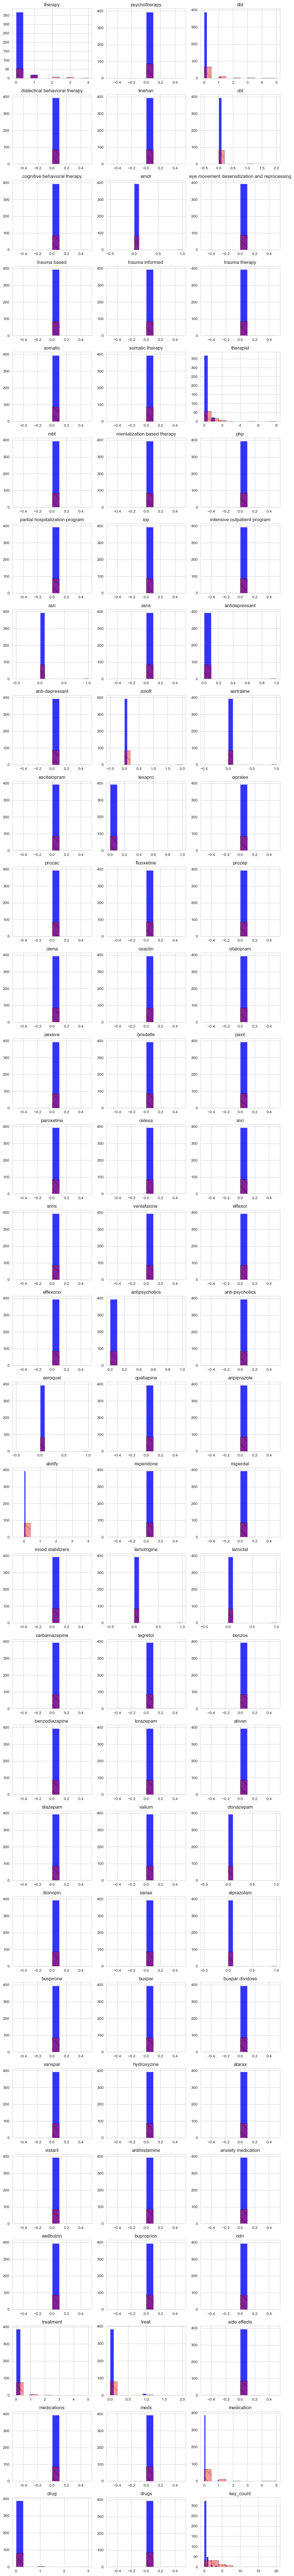

In [169]:
#len(features)
fig, axs = plt.subplots(30, 3, figsize=(10,90))

for i, ax in enumerate(axs.flatten()):
    ax.hist(X_train.loc[post_key_df['is_relevant']==0][features[i]].values,
                color='blue',
                alpha=.8,
                label="Not relevant"
                )

    ax.hist(X_train.loc[post_key_df['is_relevant']==1][features[i]].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="Relevant")
    ax.set_title(features[i])

plt.tight_layout()
plt.show()

# for feature in features:
#     plt.figure(figsize=(5,4))


#     plt.hist(post_key_df.loc[post_key_df['is_relevant']==0][feature].values,
#                 color='blue',
#                 alpha=.8,
#                 label="Not relevant")

#     plt.hist(post_key_df.loc[post_key_df['is_relevant']==1][feature].values,
#                 color='red',
#                 alpha=.4,
#                 hatch = '\\',
#                 edgecolor='black',
#                 label="Relevant")

#     plt.xlabel(feature, fontsize=14)
#     plt.legend(fontsize=14)

#     plt.show()

Useful features:

1. `key_count`
2. `medication`
3. `therapist`
4. `therapy`
5. `dbt`
6. `treat`
7. `treatment`
8. `drug`

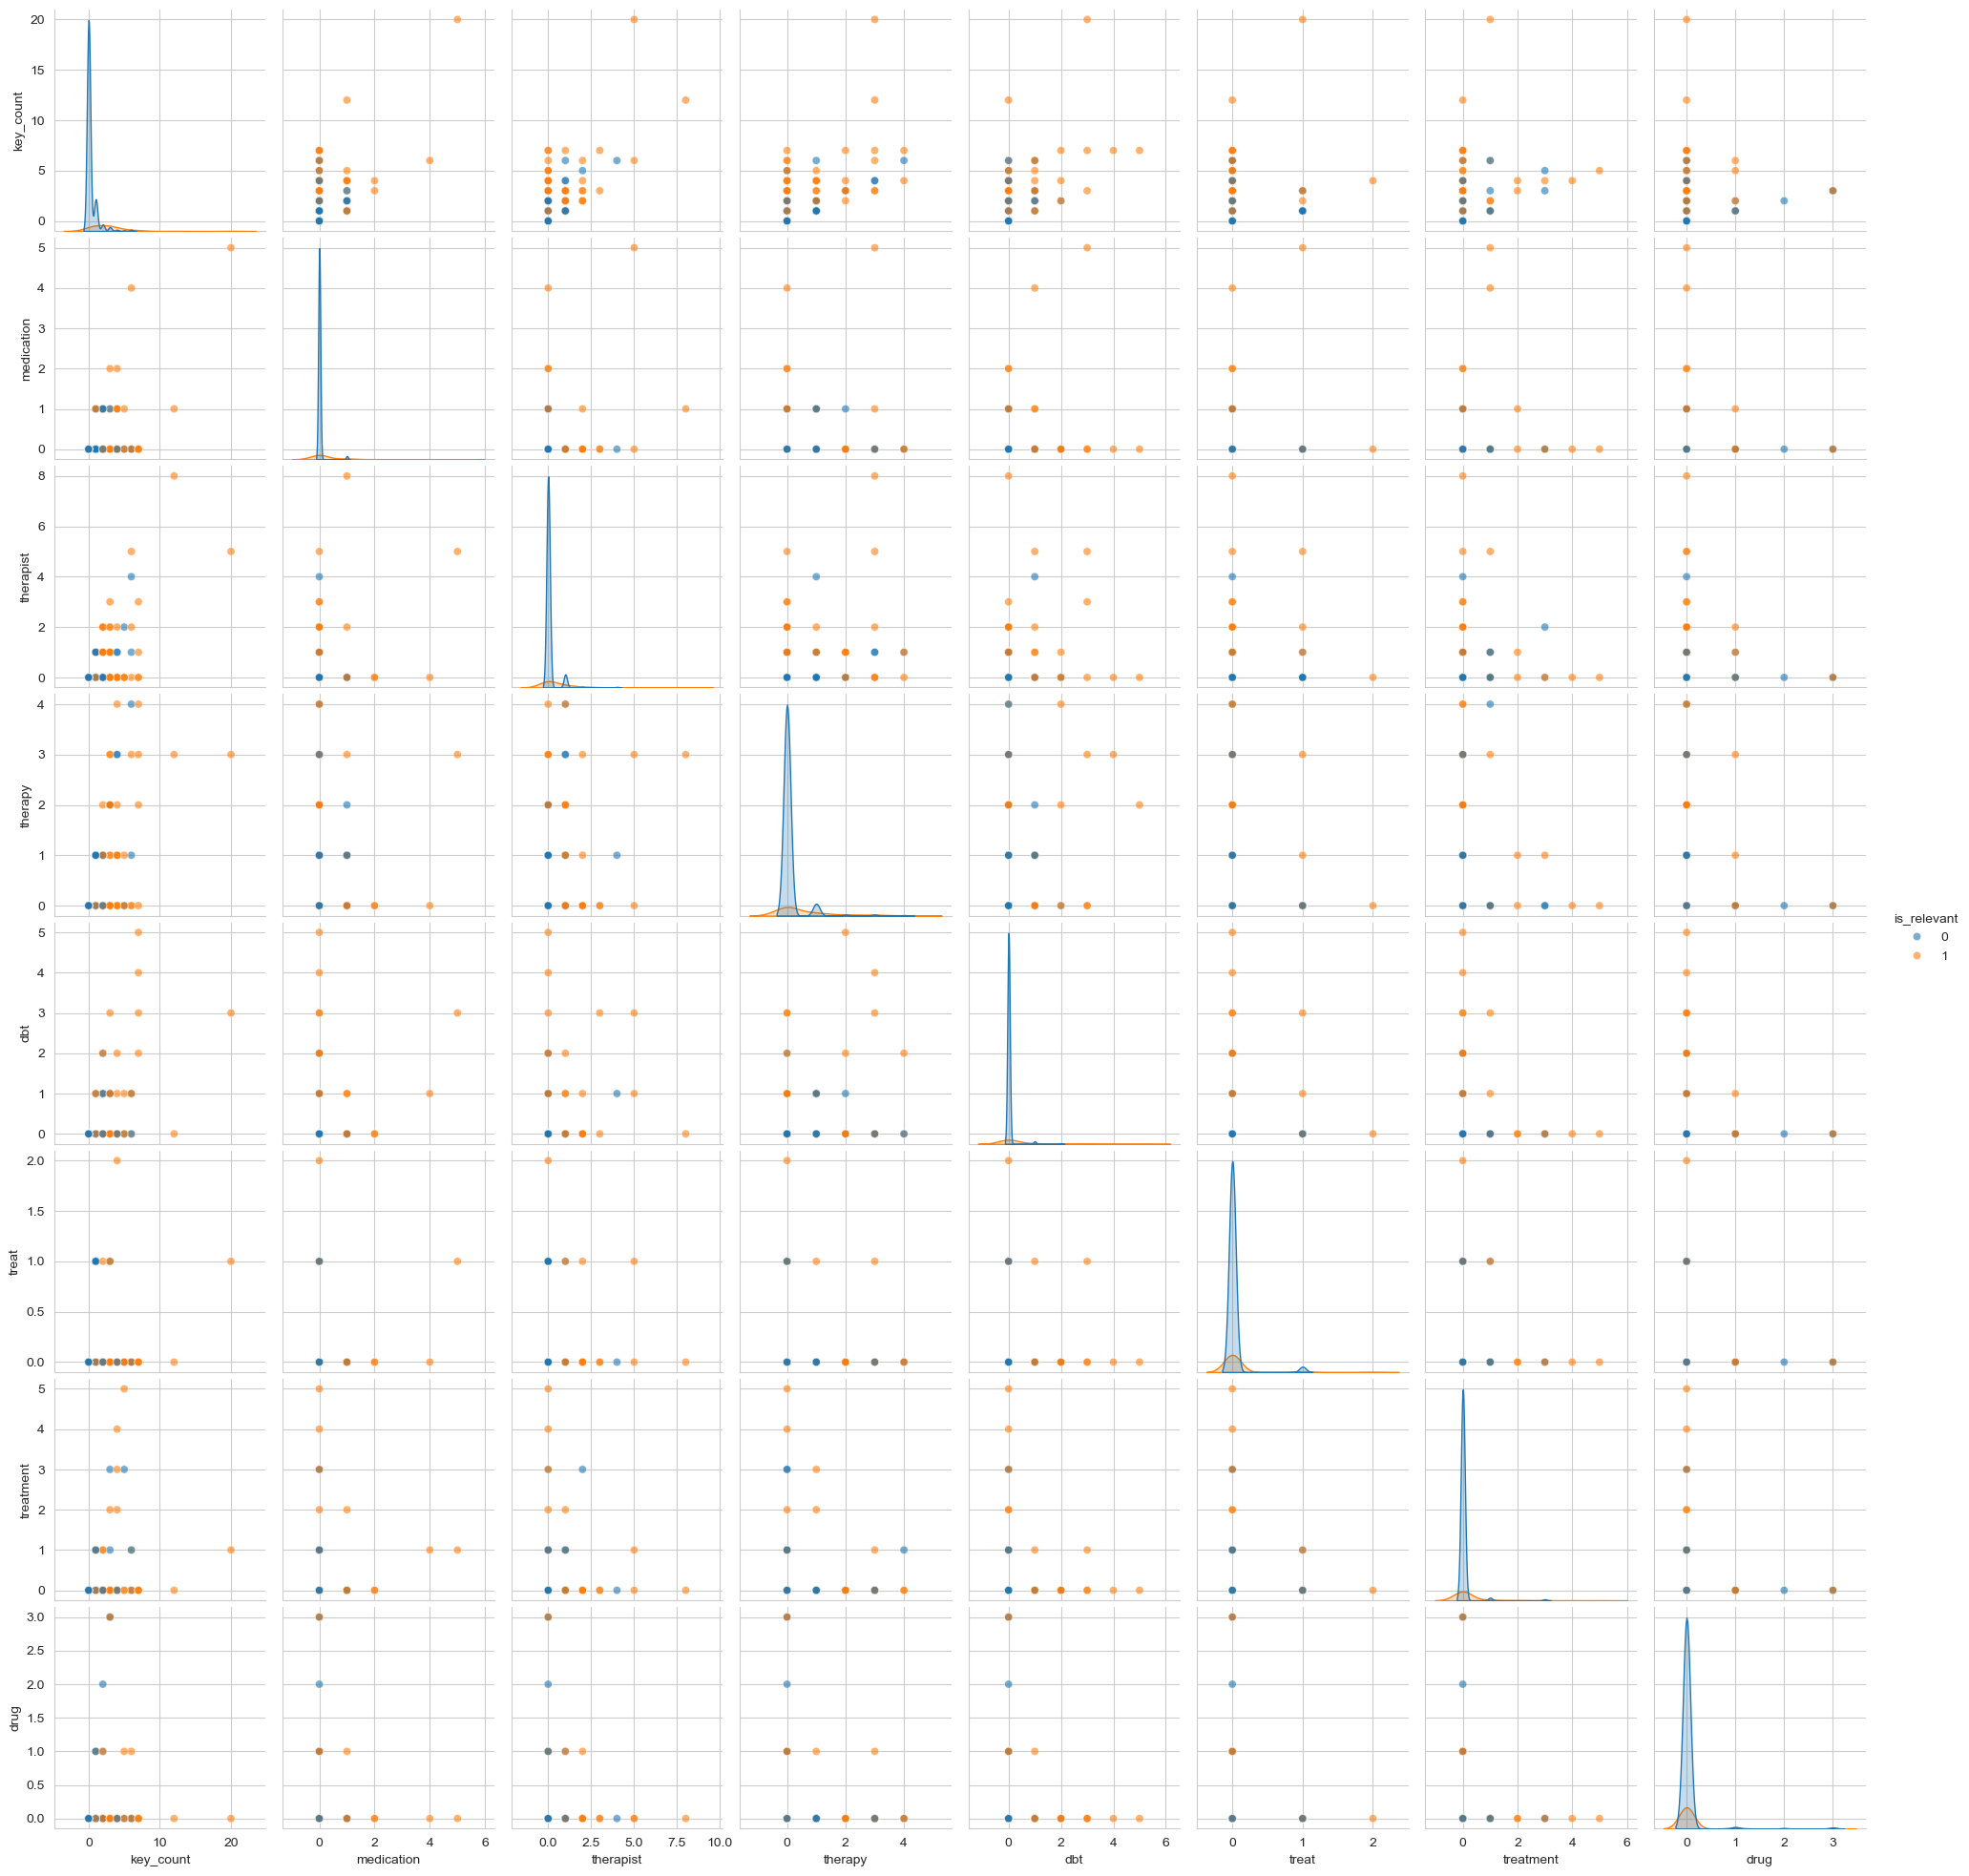

In [174]:
useful_features = ['key_count','medication','therapist','therapy','dbt','treat','treatment','drug']

sns.pairplot(data = X_train,
                x_vars = useful_features,
                y_vars = useful_features,
                hue = 'is_relevant',
                plot_kws = {'alpha':.6})

plt.show()

Seems like `key_count` with any of the other keywords could be useful...

### Feature selection with Lasso Regression...?

## Exploratory Models

##### Import Modules

In [175]:
# test splits
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# classifier models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# regularization
## penalize "large" parameters when overfitting - hyperparameter = alpha
from sklearn.linear_model import Ridge, Lasso # scale in pipeline!

# metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, recall_score, precision_score

### Make k-fold cross-validation splits

In [195]:
k = 5

kfold = StratifiedKFold(k, shuffle=True, random_state = 999)

#### Make model objects

In [196]:
## make model objects

### regression
regressors = {
    'lin_reg' : Pipeline([('poly',PolynomialFeatures(degree = 1, include_bias = False)), ('reg', LinearRegression(copy_X = True))]),
    'knn_reg' : KNeighborsRegressor(n_neighbors = 10)
}

n = 1
alpha = 1

### regularization regressors
reg_regressors = {
    'ridge' : Pipeline([('scale',StandardScaler()), #('poly',PolynomialFeatures(n, interaction_only=False, include_bias=False)),
                              ('ridge',Ridge(alpha = alpha, max_iter=5000000))
                              ]),
    'lasso' : Pipeline([('scale',StandardScaler()), #('poly',PolynomialFeatures(n, interaction_only=False, include_bias=False)),
                              ('lasso',Lasso(alpha = alpha, max_iter=5000000))
                          ])
}

### classifiers
classifiers = {
    # Linear decision boundaries
    'lda' : LinearDiscriminantAnalysis(),
    'log_reg' : LogisticRegression(penalty=None, max_iter= 100000), # no l2 regularization
    'log_reg_multi' : LogisticRegression(multi_class = 'multinomial', penalty=None, max_iter= 100000), # no l2 regularization
    'log_reg_reg' : Pipeline([('scale', StandardScaler()),('log_reg_reg', LogisticRegression(max_iter= 100000))]),
     'svc_linear' : LinearSVC(dual = 'auto'),

    # Quadratic boundaries
    'qda' : QuadraticDiscriminantAnalysis(),
    'lda_poly' : Pipeline([('scale', StandardScaler()),('poly',PolynomialFeatures(2)),('lda', LinearDiscriminantAnalysis())]),
    'log_reg_poly' : Pipeline([('scale', StandardScaler()),('poly',PolynomialFeatures(2)),('log_reg', LogisticRegression(penalty=None, max_iter= 100000))]),
    'gnb' : GaussianNB(),

    # Complex boundaries
    'knn_class' : Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier())]),   
    'svc_rbf' : Pipeline([('scale', StandardScaler()),('svc',SVC(kernel= 'rbf'))])
}

In [245]:
# list of models to try
regressors_list = ['lin_reg','knn_reg']
classifiers_list = ['log_reg','log_reg_multi','log_reg_reg','knn_class']
model_size = len(regressors_list)+len(classifiers_list)

# make cross-validation metrics to track
mses = np.zeros((len(regressors_list),k))
classifier_accs = [np.zeros(k) for i in range(len(classifiers_list))]
classifier_prec = [np.zeros(k) for i in range(len(classifiers_list))]
classifier_recall = [np.zeros(k) for i in range(len(classifiers_list))]
classifier_loss = [np.zeros(k) for i in range(len(classifiers_list))]

# do cross-validation

for i, (train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
    ## Training
    X_tt = X_train.iloc[train_index]
    y_tt = X_tt['is_relevant']

    ## Holdout set
    X_ho = X_train.iloc[test_index]
    y_ho = X_ho['is_relevant']

    ## Baseline Model
    #baseline = 

    ## Models
    models = list(range(model_size))

    ## Instantiate regressors
    for j, model in enumerate(regressors_list):
        models[j] = regressors[model]

    ## Instantiate classifiers
    for j, model in enumerate(classifiers_list):
            models[j + len(regressors_list)] = classifiers[model]
    
    # Prediction list
    preds = list(range(model_size))

    ## Fit and Predict
    for j in range(len(models)):
        models[j].fit(X_tt[useful_features].values, y_tt.values)
        preds[j] = models[j].predict(X_ho[useful_features].values)

        ## Record metrics
        if j < (len(models) - len(classifiers_list)):
            ### Recording the MSES ###
            ## mean_squared_error takes in the true values, then the predicted values
            mses[j,i] = mean_squared_error(y_ho.values, preds[j])
        else:
            classifier_accs[(j - 2)][i] = accuracy_score(y_ho.values, preds[j])
            classifier_prec[(j - 2)][i] = precision_score(y_ho.values, preds[j])
            classifier_recall[(j - 2)][i] = recall_score(y_ho.values, preds[j])
            
            # cross-entropy
            # ycs = 1*pd.get_dummies(y_tt).to_numpy()
            # pcs = models[j].predict_proba(X_tt[useful_features])
            # classifier_loss[(j-2)][i] = - np.sum(ycs * np.log(pcs))

In [246]:
print('Regression metrics:')
print('======================')
for i, model in enumerate((regressors_list)):
    print(model,'MSE:',np.mean(mses, axis=1)[i])

print()
print('Classification metrics:')
print('======================')
for i, model in enumerate((classifiers_list)):
    print(model)
    print('======================')
    print(f'{k}'+'-fold mean accuracy:', np.mean(classifier_accs[i]))
    print(f'{k}'+'-fold mean precision:', np.mean(classifier_prec[i]))
    print(f'{k}'+'-fold mean recall:', np.mean(classifier_recall[i]))
    #print(f'{k}'+'-fold mean cross-entropy:', np.mean(classifier_loss[i]))
    print()

Regression metrics:
lin_reg MSE: 0.1240240435768255
knn_reg MSE: 0.09335416666666665

Classification metrics:
log_reg
5-fold mean accuracy: 0.8729166666666668
5-fold mean precision: 0.7547619047619047
5-fold mean recall: 0.47777777777777775

log_reg_multi
5-fold mean accuracy: 0.8729166666666668
5-fold mean precision: 0.7547619047619047
5-fold mean recall: 0.47777777777777775

log_reg_reg
5-fold mean accuracy: 0.8729166666666668
5-fold mean precision: 0.7634615384615384
5-fold mean recall: 0.4542483660130719

knn_class
5-fold mean accuracy: 0.85625
5-fold mean precision: 0.6794117647058823
5-fold mean recall: 0.3843137254901961



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

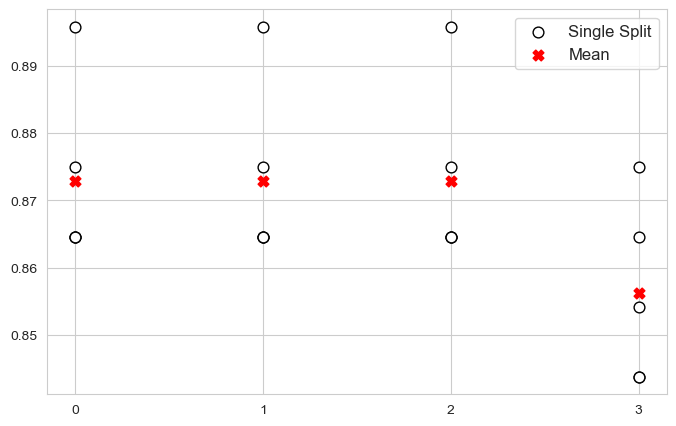

In [247]:
## This figure will compare the performance
plt.figure(figsize=(8,5))

plt.scatter(np.zeros(k), 
            classifier_accs[0], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Single Split")
plt.scatter(np.ones(k), 
            classifier_accs[1], 
            s=60, 
            c='white',
            edgecolor='black')
plt.scatter(2*np.ones(k), 
            classifier_accs[2], 
            s=60, 
            c='white',
            edgecolor='black')

plt.scatter(3*np.ones(k), 
            classifier_accs[3], 
            s=60, 
            c='white',
            edgecolor='black')

plt.scatter([0,1,2,3], 
            np.mean(classifier_accs, axis=1), 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.legend(fontsize=12)

plt.xticks([0,1,2,3],[model for model in regressors_list], fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel("Accuracy", fontsize=12)

plt.show()

In [244]:
len(classifier_accs)

6

# ADD COUNT OF UNIQUE KEYWORDS TO FEATURES!!!!!!!!!!!

## Try more models and add confusion matrix, etc.